In [2]:
import numpy as np
from scipy import signal

In [5]:
def harris(img, patch_size, kappa):
    sobel_x = np.array(-1, 0, 1, -2, 0, 2, -1, 0, 1).reshape(3, 3)
    sobel_y = np.array((-1, -2, -1, 0, 0, 0, 1, 2, 1)).reshape(3,3) 
    I_x = signal.convolve2d(img, sobel_x, mode='valid')
    I_y = signal.convolve2d(img, sobel_y, mode='valid')
    
    I_x_square = I_x * I_x
    I_y_square = I_y * I_y
    I_xy = I_x * I_y
    
    box_matrix = np.ones((patch_size,patch_size))
    
    
    sum_I_xx = signal.convolve2d(I_x_square, box_matrix, mode='valid') 
    sum_I_yy = signal.convolve2d(I_y_square, box_matrix, mode='valid' )
    sum_I_xy = signal.convolve2d(I_xy, box_matrix, mode='valid')
    
    m, n = sum_I_xx.shape[0], sum_I_xx.shape[1]
    
    M1 = np.concatenate((sum_I_xx.reshape(m,n,1,1),sum_I_xy.reshape(m,n,1,1)),axis=3)
    M2 = np.concatenate((sum_I_xy.reshape(m,n,1,1),sum_I_yy.reshape(m,n,1,1)),axis=3)
    M = np.concatenate((M1,M2),axis = 2)
    w,v = numpy.linalg.eig(M)
    R_H = np.linalg.det(M) - 0.08* np.trace(M,axis1=2,axis2=3)* np.trace(M,axis1=2,axis2=3)
    R_st = np.min(w,axis=2)
    
    pad_size = int(sobel_x.shape[1]/2)+int(box_matrix.shape[1]/2)
    R_H = np.lib.pad(R_H,(pad_size,pad_size), 'constant', constant_values=(0, 0))
    R_st = np.lib.pad(R_st,(pad_size,pad_size), 'constant', constant_values=(0, 0))
  
    return R_H, R_st

In [35]:
I_test = np.array([[2,0],[1,4]])

In [36]:
I_test*I_test

array([[ 4,  0],
       [ 1, 16]])

In [14]:
sobel_x = np.array((-1, 0, 1, -2, 0, 2, -1, 0, 1)).reshape(3, 3)

In [15]:
sobel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [16]:
sobel_y = np.array((-1, -2, -1, 0, 0, 0, 1, 2, 1)).reshape(3,3) 

In [17]:
sobel_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [153]:
from scipy import signal

from scipy import misc

import cv2

ascent = misc.ascent()
ascent = cv2.imread('/home/mullin/WorkSpace/CourseProject/3 VAMR/Exercise 3 - Simple Keypoint Tracker/data/WH__0251 (Large).tif', cv2.IMREAD_GRAYSCALE)

I_x = signal.convolve2d(ascent, sobel_x, mode='valid')
I_y = signal.convolve2d(ascent, sobel_y, mode='valid')
I_x_square = I_x * I_x
I_y_square = I_y * I_y
I_xy = I_x * I_y
patch_size = 9
box_matrix = np.ones((patch_size,patch_size))
sum_I_xx = signal.convolve2d(I_x_square, box_matrix, mode='valid') 
sum_I_yy = signal.convolve2d(I_y_square, box_matrix, mode='valid')
sum_I_xy = signal.convolve2d(I_xy, box_matrix, mode='valid')
m, n = sum_I_xx.shape[0], sum_I_xx.shape[1]


In [154]:
m, n = sum_I_xx.shape[0], sum_I_xx.shape[1]

In [155]:
m,n

(1610, 1070)

In [156]:
M1 = np.concatenate((sum_I_xx.reshape(m,n,1,1),sum_I_xy.reshape(m,n,1,1)),axis=3)

In [157]:
M1.shape

(1610, 1070, 1, 2)

In [158]:
M2 = np.concatenate((sum_I_xy.reshape(m,n,1,1),sum_I_yy.reshape(m,n,1,1)),axis=3)

In [159]:
M2.shape

(1610, 1070, 1, 2)

In [160]:
M = np.concatenate((M1,M2),axis = 2)

In [161]:
M.shape

(1610, 1070, 2, 2)

In [162]:
w,v = np.linalg.eig(M)

In [163]:
w.shape

(1610, 1070, 2)

In [164]:
v.shape

(1610, 1070, 2, 2)

In [165]:
R_H = np.linalg.det(M) - 0.08* np.trace(M,axis1=2,axis2=3)* np.trace(M,axis1=2,axis2=3)

In [166]:
R_st = np.min(w,axis=2)

In [167]:
R_st.shape

(1610, 1070)

/tmp/ipykernel_12308/875417510.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


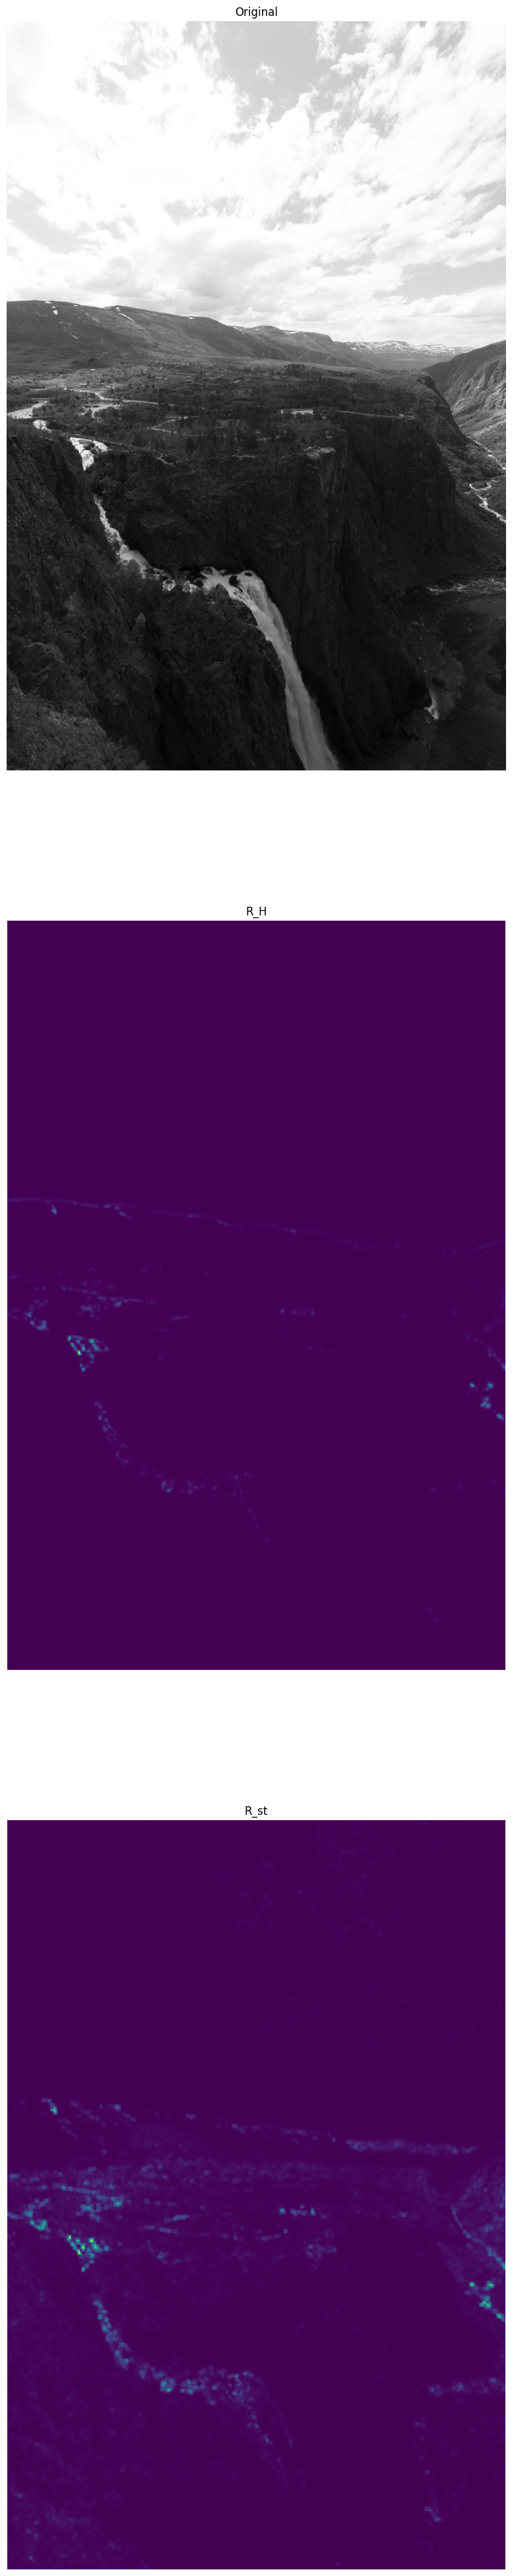

In [169]:
import matplotlib.pyplot as plt

fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(20, 50))

ax_orig.imshow(ascent, cmap='gray')

ax_orig.set_title('Original')

ax_orig.set_axis_off()

ax_mag.imshow(np.absolute(R_H))

ax_mag.set_title('R_H')

ax_mag.set_axis_off()

ax_ang.imshow(np.absolute(R_st)) # hsv is cyclic, like angles

ax_ang.set_title('R_st')

ax_ang.set_axis_off()

fig.show()

In [12]:
from scipy import signal

from scipy import misc

ascent = misc.ascent()

scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],

                   [-10+0j, 0+ 0j, +10 +0j],

                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy

grad = signal.convolve2d(ascent, scharr, mode='valid')

/tmp/ipykernel_12308/4072775698.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


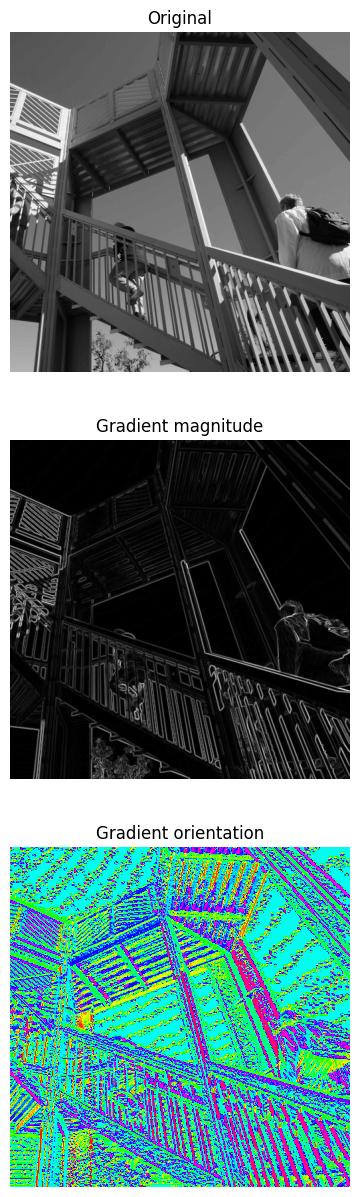

In [13]:
import matplotlib.pyplot as plt

fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))

ax_orig.imshow(ascent, cmap='gray')

ax_orig.set_title('Original')

ax_orig.set_axis_off()

ax_mag.imshow(np.absolute(grad), cmap='gray')

ax_mag.set_title('Gradient magnitude')

ax_mag.set_axis_off()

ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles

ax_ang.set_title('Gradient orientation')

ax_ang.set_axis_off()

fig.show()

In [3]:
sobel_x = np.array((-1, 0, 1, -2, 0, 2, -1, 0, 1)).reshape(3, 3)
box_matrix = np.ones((9, 9))
sobel_pad = int(sobel_x.shape[1]/2)
sum_pad = int(box_matrix.shape[1]/2)
pad_size = int(sobel_x.shape[1]/2)+int(box_matrix.shape[1]/2)
pad_size

5

In [4]:
a = [(1, 2, 3), (4, 5, 6)]
np.lib.pad(a, (3,3), 'constant', constant_values=(0, 0))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 3, 0, 0, 0],
       [0, 0, 0, 4, 5, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])